#Optimisation de la planification des voyages d’une compagnie de transport (LK) au Togo

[lien vers le document de l'exercice](https://docs.google.com/document/d/12hkdXljYHMCwb9ngQVY0Mlh9CavijEtl/edit?usp=sharing&ouid=109119165270247087707&rtpof=true&sd=true)

[lien vers les données](https://drive.google.com/file/d/1ONUSVPYSW7uLCsLwiX9-HNJ-Ef3gFS_8/view?usp=sharing)

Importations des packages et données

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
data = pd.read_csv('/content/drive/MyDrive/D-CLIC /sklearn/Dataset/dataset_planification_transport_LK.csv')
data.head(10)

,trajet_id,ville_depart,ville_arrivee,distance_km,duree_prevue_h,retard_min,prix_billet,nb_passagers,capacite_bus,type_bus,jour_semaine,periode_depart,condition_route,carburant_litre,satisfaction_client
0,1,Tsévié,Tsévié,56.0,7.2,163.0,8847.0,52.0,50.0,Climatisé,Dimanche,Après-midi,Bonne,43.4,3
1,2,Sokodé,Tsévié,NaN,2.9,124.0,9401.0,39.0,NaN,Standard,Dimanche,NaN,Moyenne,73.7,4
2,3,Dapaong,Sokodé,496.0,1.6,163.0,9228.0,56.0,NaN,Standard,Dimanche,Soir,Bonne,26.5,2
3,4,Sokodé,Lomé,463.0,8.8,88.0,3618.0,NaN,NaN,VIP,Jeudi,Matin,Mauvaise,42.5,4
4,5,Kara,Dapaong,130.0,3.4,32.0,7518.0,67.0,50.0,VIP,Dimanche,Après-midi,Mauvaise,21.5,1
5,6,Atakpamé,Dapaong,643.0,7.7,172.0,3194.0,26.0,30.0,Standard,Samedi,Soir,Bonne,46.1,1
6,7,Sokodé,Atakpamé,491.0,6.4,143.0,4272.0,43.0,40.0,Standard,Samedi,Soir,Bonne,63.0,5
7,8,Atakpamé,Kara,642.0,6.1,40.0,11106.0,20.0,40.0,Climatisé,Mardi,NaN,Mauvaise,58.2,4
8,9,Kara,Tsévié,284.0,4.8,135.0,3824.0,66.0,30.0,Climatisé,NaN,Soir,Mauvaise,NaN,4
9,10,Kara,Atakpamé,345.0,7.0,167.0,8811.0,29.0,30.0,Standard,Mercredi,Soir,Bonne,32.4,1


Visualisation de la carte thermique (heatmap) des valeurs manquantes

<Axes: >

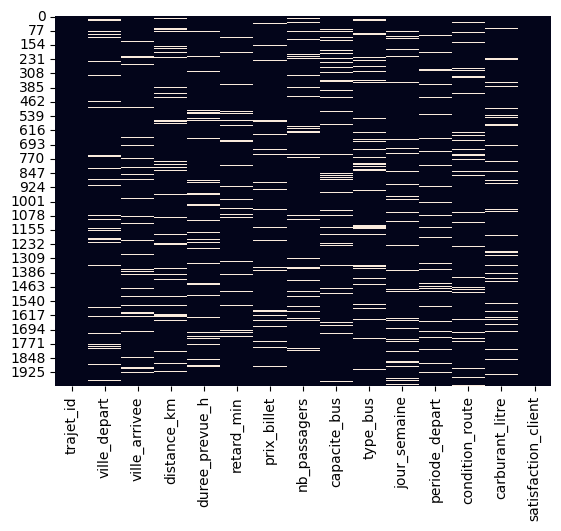

In [29]:
def visualize_nan(data): plt.figure(figsize=(10, 5))
sns.heatmap(data.isna(), cbar=False)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trajet_id            2000 non-null   int64  
 1   ville_depart         1844 non-null   object 
 2   ville_arrivee        1840 non-null   object 
 3   distance_km          1840 non-null   float64
 4   duree_prevue_h       1840 non-null   float64
 5   retard_min           1840 non-null   float64
 6   prix_billet          1840 non-null   float64
 7   nb_passagers         1836 non-null   float64
 8   capacite_bus         1840 non-null   float64
 9   type_bus             1840 non-null   object 
 10  jour_semaine         1840 non-null   object 
 11  periode_depart       1840 non-null   object 
 12  condition_route      1840 non-null   object 
 13  carburant_litre      1840 non-null   float64
 14  satisfaction_client  2000 non-null   int64  
dtypes: float64(7), int64(2), object(6)
mem

Valeurs manquants

In [31]:
missing_count = data.isna().sum()
missing_percent = (missing_count / len(data)) * 100

missing_summary = pd.DataFrame({
    'Valeurs manquantes': missing_count,
    'Pourcentage (%)': missing_percent
}).sort_values(by='Pourcentage (%)', ascending=False)

missing_summary


,Valeurs manquantes,Pourcentage (%)
nb_passagers,164,8.2
duree_prevue_h,160,8.0
ville_arrivee,160,8.0
retard_min,160,8.0
prix_billet,160,8.0
capacite_bus,160,8.0
distance_km,160,8.0
periode_depart,160,8.0
condition_route,160,8.0
type_bus,160,8.0


In [32]:
data.describe()


,trajet_id,distance_km,duree_prevue_h,retard_min,prix_billet,nb_passagers,capacite_bus,carburant_litre,satisfaction_client
count,2000.000000,1840.000000,1840.000000,1840.000000,1840.000000,1836.000000,1840.000000,1840.000000,2000.00000
mean,1000.500000,352.983696,6.775326,91.687500,6726.460326,37.994009,50.315217,47.511196,2.99750
std,577.494589,173.609929,2.975420,51.889587,3071.395956,19.120825,13.968371,18.564397,1.39695
min,1.000000,50.000000,1.500000,0.000000,1528.000000,5.000000,30.000000,15.000000,1.00000
25%,500.750000,203.000000,4.200000,48.000000,4008.000000,21.000000,40.000000,31.575000,2.00000
50%,1000.500000,355.000000,6.900000,93.000000,6599.000000,39.000000,50.000000,47.350000,3.00000
75%,1500.250000,503.000000,9.300000,137.000000,9527.000000,54.000000,60.000000,63.500000,4.00000
max,2000.000000,649.000000,12.000000,179.000000,11997.000000,79.000000,70.000000,80.000000,5.00000


### Analyse des Statistiques Descriptives (data.describe())

L'analyse des statistiques descriptives pour les variables numériques nous donne un premier aperçu de la distribution des données, des valeurs manquantes potentielles, et de la présence d'aberrations.

**Observations Générales :**

*   **Nombre d'observations (`count`)** : Toutes les colonnes numériques ont moins de 2000 observations (entre 1836 et 1840). Cela confirme la présence de **valeurs manquantes** dans ces colonnes, ce qui devra être traité. `nb_passagers` est la colonne avec le plus de valeurs manquantes (1836 sur 2000, soit 164 manquantes).

**Détail par Colonne :**

*   **`distance_km`** :
    *   **Minimum (50 km) et Maximum (649 km)** : La plage de distances semble réaliste pour des trajets de bus interurbains.
    *   **Moyenne (353 km) et Médiane (355 km)** : Les valeurs sont très proches, ce qui suggère une distribution relativement symétrique, sans décalage prononcé causé par des valeurs extrêmes.

*   **`duree_prevue_h`** :
    *   **Minimum (1.5h) et Maximum (12h)** : Ces durées sont cohérentes pour des voyages en bus.
    *   **Moyenne (6.77h) et Médiane (6.9h)** : Similaire à `distance_km`, la distribution semble symétrique.

*   **`retard_min`** :
    *   **Minimum (0 min) et Maximum (179 min)** : Le fait qu'il y ait des retards de 0 minute est positif. Le retard maximum de près de 3 heures (`179 min`) est significatif et pourrait avoir un impact sur la satisfaction client. Cette variable est cruciale.
    *   **Moyenne (91.68 min) et Médiane (93 min)** : Encore une fois, une distribution assez équilibrée des retards.

*   **`prix_billet`** :
    *   **Minimum (1528) et Maximum (11997)** : Une large gamme de prix, ce qui est attendu en fonction de la distance, du type de bus, etc.
    *   **Moyenne (6726) et Médiane (6599)** : La moyenne et la médiane sont proches, suggérant une distribution sans forte asymétrie.

*   **`nb_passagers`** :
    *   **Minimum (5) et Maximum (79)** : Le nombre de passagers est dans une fourchette réaliste pour des bus. Le minimum de 5 passagers pourrait indiquer des trajets peu rentables ou en dehors des heures de pointe.
    *   **Moyenne (37.99) et Médiane (39)** : Distribution symétrique. C'est la colonne numérique avec le plus de valeurs manquantes.

*   **`capacite_bus`** :
    *   **Minimum (30) et Maximum (70)** : Ces capacités sont standard pour différents types de bus.
    *   **Moyenne (50.31) et Médiane (50)** : Ces valeurs sont très cohérentes avec les capacités typiques. Les valeurs à 25%, 50% et 75% (`40`, `50`, `60`) suggèrent que les capacités sont probablement des valeurs discrètes (e.g., 30, 40, 50, 60, 70 places).

*   **`carburant_litre`** :
    *   **Minimum (15) et Maximum (80)** : Plage de consommation de carburant plausible pour un trajet.
    *   **Moyenne (47.51) et Médiane (47.35)** : Distribution symétrique.


**Synthèse des Problèmes Potentiels :**

1.  **Valeurs Manquantes Généralisées** : Toutes les colonnes numériques présentent des valeurs manquantes. `nb_passagers` est la plus affectée. Il sera impératif d'appliquer une stratégie d'imputation (par exemple, la médiane, comme prévu dans votre plan) pour ces colonnes.
2.  **Aucune Aberration Évidente** : D'après ces statistiques, il n'y a pas de valeurs minimales ou maximales qui semblent totalement irréalistes ou de fortes asymétries qui indiqueraient des erreurs de saisie grossières ou des *outliers* extrêmes. Cependant, une vérification visuelle (par exemple, avec des box plots) pourrait confirmer l'absence d'outliers subtils.
3.  **Nature Discrète de `capacite_bus`** : La `capacite_bus` semble être une variable discrète, ce qui est normal. Cela n'est pas un problème, mais une caractéristique à prendre en compte lors de l'encodage si nécessaire ou du *feature engineering*.

**Prochaines Étapes Suggérées :**

*   L'étape la plus immédiate est de **traiter les valeurs manquantes** dans ces colonnes numériques.
*   Ensuite, il faudra se pencher sur les **variables catégorielles** pour identifier et traiter leurs propres valeurs manquantes et éventuelles incohérences.

In [33]:
incoherent_passengers = data[data['nb_passagers'] > data['capacite_bus']]
len(incoherent_passengers)


549

### Création d'une variable 'surcharge' dans data

Nous allons créer une nouvelle colonne `surcharge_initiale` dans le DataFrame `data` pour marquer les trajets où le nombre de passagers était initialement supérieur à la capacité du bus. Cette variable binaire (1 si surcharge, 0 sinon) permettra au modèle de capturer l'impact de ces situations sur la satisfaction client.

In [34]:
# Création de la variable binaire 'surcharge_initiale' dans data
# Nous utilisons data car il contient encore les valeurs originales de nb_passagers et capacite_bus avant toute correction/imputation sur X
data['surcharge_initiale'] = ((data['nb_passagers'] > data['capacite_bus']) &
                         data['nb_passagers'].notna() &
                         data['capacite_bus'].notna()).astype(int)

# Affichage des premières lignes de X avec la nouvelle variable
display(data.head(10))

# Comptage des cas de surcharge
print(f"Nombre de trajets avec surcharge initiale : {data['surcharge_initiale'].sum()}")

,trajet_id,ville_depart,ville_arrivee,distance_km,duree_prevue_h,retard_min,prix_billet,nb_passagers,capacite_bus,type_bus,jour_semaine,periode_depart,condition_route,carburant_litre,satisfaction_client,surcharge_initiale
0,1,Tsévié,Tsévié,56.0,7.2,163.0,8847.0,52.0,50.0,Climatisé,Dimanche,Après-midi,Bonne,43.4,3,1
1,2,Sokodé,Tsévié,NaN,2.9,124.0,9401.0,39.0,NaN,Standard,Dimanche,NaN,Moyenne,73.7,4,0
2,3,Dapaong,Sokodé,496.0,1.6,163.0,9228.0,56.0,NaN,Standard,Dimanche,Soir,Bonne,26.5,2,0
3,4,Sokodé,Lomé,463.0,8.8,88.0,3618.0,NaN,NaN,VIP,Jeudi,Matin,Mauvaise,42.5,4,0
4,5,Kara,Dapaong,130.0,3.4,32.0,7518.0,67.0,50.0,VIP,Dimanche,Après-midi,Mauvaise,21.5,1,1
5,6,Atakpamé,Dapaong,643.0,7.7,172.0,3194.0,26.0,30.0,Standard,Samedi,Soir,Bonne,46.1,1,0
6,7,Sokodé,Atakpamé,491.0,6.4,143.0,4272.0,43.0,40.0,Standard,Samedi,Soir,Bonne,63.0,5,1
7,8,Atakpamé,Kara,642.0,6.1,40.0,11106.0,20.0,40.0,Climatisé,Mardi,NaN,Mauvaise,58.2,4,0
8,9,Kara,Tsévié,284.0,4.8,135.0,3824.0,66.0,30.0,Climatisé,NaN,Soir,Mauvaise,NaN,4,1
9,10,Kara,Atakpamé,345.0,7.0,167.0,8811.0,29.0,30.0,Standard,Mercredi,Soir,Bonne,32.4,1,0


Nombre de trajets avec surcharge initiale : 549


### Traitement des retards négatifs



In [35]:
# Vérifier s'il y a des retards négatifs
negative_retards_count = (data['retard_min'] < 0).sum()
print(f"Nombre de trajets avec un retard négatif avant correction : {negative_retards_count}")



Nombre de trajets avec un retard négatif avant correction : 0


### Traitement des valeurs nulles ou négatives pour `carburant_litre`

In [36]:
# Vérifier s'il y a des valeurs négatives dans 'carburant_litre'
negative_carburant_count = (data['carburant_litre'] <= 0).sum()
print(f"Nombre de trajets avec une valeur négative de carburant_litre : {negative_carburant_count}")


Nombre de trajets avec une valeur négative de carburant_litre : 0


### Traitement des trajets où `ville_depart` égale `ville_arrivee`



In [37]:
# Nombre total de trajets avant exclusion
print("Nombre total de trajets (avant exclusion) :", len(data))
# Nombre de trajets ville_depart == ville_arrivee
same_city_count = (data['ville_depart'] == data['ville_arrivee']).sum()
print("Trajets ville_depart == ville_arrivee :", same_city_count)





Nombre total de trajets (avant exclusion) : 2000
Trajets ville_depart == ville_arrivee : 326


In [38]:
# Création du dataset final pour la modélisation
data_model = data[data['ville_depart'] != data['ville_arrivee']].copy()
data_model.head(10)

,trajet_id,ville_depart,ville_arrivee,distance_km,duree_prevue_h,retard_min,prix_billet,nb_passagers,capacite_bus,type_bus,jour_semaine,periode_depart,condition_route,carburant_litre,satisfaction_client,surcharge_initiale
1,2,Sokodé,Tsévié,NaN,2.9,124.0,9401.0,39.0,NaN,Standard,Dimanche,NaN,Moyenne,73.7,4,0
2,3,Dapaong,Sokodé,496.0,1.6,163.0,9228.0,56.0,NaN,Standard,Dimanche,Soir,Bonne,26.5,2,0
3,4,Sokodé,Lomé,463.0,8.8,88.0,3618.0,NaN,NaN,VIP,Jeudi,Matin,Mauvaise,42.5,4,0
4,5,Kara,Dapaong,130.0,3.4,32.0,7518.0,67.0,50.0,VIP,Dimanche,Après-midi,Mauvaise,21.5,1,1
5,6,Atakpamé,Dapaong,643.0,7.7,172.0,3194.0,26.0,30.0,Standard,Samedi,Soir,Bonne,46.1,1,0
6,7,Sokodé,Atakpamé,491.0,6.4,143.0,4272.0,43.0,40.0,Standard,Samedi,Soir,Bonne,63.0,5,1
7,8,Atakpamé,Kara,642.0,6.1,40.0,11106.0,20.0,40.0,Climatisé,Mardi,NaN,Mauvaise,58.2,4,0
8,9,Kara,Tsévié,284.0,4.8,135.0,3824.0,66.0,30.0,Climatisé,NaN,Soir,Mauvaise,NaN,4,1
9,10,Kara,Atakpamé,345.0,7.0,167.0,8811.0,29.0,30.0,Standard,Mercredi,Soir,Bonne,32.4,1,0
10,11,Lomé,Dapaong,381.0,11.7,55.0,8641.0,31.0,30.0,VIP,Dimanche,Après-midi,Moyenne,44.3,1,1


In [39]:
print("Nombre total de trajets (après exclusion) :", len(data_model))

print(
    "Trajets ville_depart == ville_arrivee restants :",
    (data_model['ville_depart'] == data_model['ville_arrivee']).sum()
)


Nombre total de trajets (après exclusion) : 1674
Trajets ville_depart == ville_arrivee restants : 0


In [40]:
data_model[['ville_depart', 'ville_arrivee']].head()


,ville_depart,ville_arrivee
1,Sokodé,Tsévié
2,Dapaong,Sokodé
3,Sokodé,Lomé
4,Kara,Dapaong
5,Atakpamé,Dapaong


L’analyse des données a révélé la présence de 326 trajets pour lesquels la ville de départ est identique à la ville d’arrivée, représentant environ 16 % du jeu de données. Bien que ces observations puissent correspondre à des trajets internes ou à des erreurs de saisie, elles ne sont pas cohérentes avec le périmètre métier du projet, qui porte sur la planification de liaisons interurbaines entre différentes villes du Togo.

Afin de garantir la cohérence des données utilisées pour la modélisation et d’éviter l’introduction de bruit, ces trajets ont été exclus du jeu de données destiné à l’apprentissage des modèles. Ils sont toutefois conservés à titre informatif dans l’analyse exploratoire.



Gestion des valeurs manquantes

Séparation des types de variables

In [41]:
num_cols = data_model.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data_model.select_dtypes(include=['object']).columns
num_cols

Index(['trajet_id', 'distance_km', 'duree_prevue_h', 'retard_min',
       'prix_billet', 'nb_passagers', 'capacite_bus', 'carburant_litre',
       'satisfaction_client', 'surcharge_initiale'],
      dtype='object')

In [42]:
cat_cols

Index(['ville_depart', 'ville_arrivee', 'type_bus', 'jour_semaine',
       'periode_depart', 'condition_route'],
      dtype='object')

Imputation des variables numériques (médiane)

In [43]:
for col in num_cols:
    median_value = data_model[col].median()
    data_model[col].fillna(median_value, inplace=True)


/tmp/ipython-input-3651434112.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_model[col].fillna(median_value, inplace=True)


Imputation des variables catégorielles (mode)

In [44]:
for col in cat_cols:
    mode_value = data_model[col].mode()[0]
    data_model[col].fillna(mode_value, inplace=True)


/tmp/ipython-input-1083799327.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_model[col].fillna(mode_value, inplace=True)


In [45]:
data_model.isna().sum()


,0
trajet_id,0
ville_depart,0
ville_arrivee,0
distance_km,0
duree_prevue_h,0
retard_min,0
prix_billet,0
nb_passagers,0
capacite_bus,0
type_bus,0


In [46]:
data_model.head(10)

,trajet_id,ville_depart,ville_arrivee,distance_km,duree_prevue_h,retard_min,prix_billet,nb_passagers,capacite_bus,type_bus,jour_semaine,periode_depart,condition_route,carburant_litre,satisfaction_client,surcharge_initiale
1,2,Sokodé,Tsévié,360.0,2.9,124.0,9401.0,39.0,50.0,Standard,Dimanche,Soir,Moyenne,73.7,4,0
2,3,Dapaong,Sokodé,496.0,1.6,163.0,9228.0,56.0,50.0,Standard,Dimanche,Soir,Bonne,26.5,2,0
3,4,Sokodé,Lomé,463.0,8.8,88.0,3618.0,38.5,50.0,VIP,Jeudi,Matin,Mauvaise,42.5,4,0
4,5,Kara,Dapaong,130.0,3.4,32.0,7518.0,67.0,50.0,VIP,Dimanche,Après-midi,Mauvaise,21.5,1,1
5,6,Atakpamé,Dapaong,643.0,7.7,172.0,3194.0,26.0,30.0,Standard,Samedi,Soir,Bonne,46.1,1,0
6,7,Sokodé,Atakpamé,491.0,6.4,143.0,4272.0,43.0,40.0,Standard,Samedi,Soir,Bonne,63.0,5,1
7,8,Atakpamé,Kara,642.0,6.1,40.0,11106.0,20.0,40.0,Climatisé,Mardi,Soir,Mauvaise,58.2,4,0
8,9,Kara,Tsévié,284.0,4.8,135.0,3824.0,66.0,30.0,Climatisé,Vendredi,Soir,Mauvaise,47.0,4,1
9,10,Kara,Atakpamé,345.0,7.0,167.0,8811.0,29.0,30.0,Standard,Mercredi,Soir,Bonne,32.4,1,0
10,11,Lomé,Dapaong,381.0,11.7,55.0,8641.0,31.0,30.0,VIP,Dimanche,Après-midi,Moyenne,44.3,1,1


In [54]:
data_model.columns

Index(['trajet_id', 'ville_depart', 'ville_arrivee', 'distance_km',
       'duree_prevue_h', 'retard_min', 'prix_billet', 'nb_passagers',
       'capacite_bus', 'type_bus', 'jour_semaine', 'periode_depart',
       'condition_route', 'carburant_litre', 'satisfaction_client',
       'surcharge_initiale', 'taux_remplissage'],
      dtype='object')

In [47]:
data_model.isna().sum()


,0
trajet_id,0
ville_depart,0
ville_arrivee,0
distance_km,0
duree_prevue_h,0
retard_min,0
prix_billet,0
nb_passagers,0
capacite_bus,0
type_bus,0


In [48]:
(data_model['nb_passagers'] > data_model['capacite_bus']).sum()


np.int64(506)

In [49]:
(data_model['carburant_litre'] <= 0).sum()


np.int64(0)

FEATURE ENGINEERING

In [50]:
data_model['taux_remplissage'] = data_model['nb_passagers'] / data_model['capacite_bus']


In [60]:
data_model['surcharge_ratio'] = data_model['nb_passagers'] / data_model['capacite_bus']


In [61]:
data_model['retard_par_km'] = data_model['retard_min'] / data_model['distance_km']


In [62]:
data_model['conso_par_km'] = data_model['carburant_litre'] / data_model['distance_km']


In [63]:
data_model['carburant_par_passager'] = data_model['carburant_litre'] / data_model['nb_passagers']


In [64]:
data_model[['nb_passagers',
            'capacite_bus',
            'taux_remplissage',
            'retard_par_km',
            'conso_par_km',
            'carburant_par_passager']].head()


,nb_passagers,capacite_bus,taux_remplissage,retard_par_km,conso_par_km,carburant_par_passager
1,39.0,50.0,0.780000,0.344444,0.204722,1.889744
2,56.0,50.0,1.120000,0.328629,0.053427,0.473214
3,38.5,50.0,0.770000,0.190065,0.091793,1.103896
4,67.0,50.0,1.340000,0.246154,0.165385,0.320896
5,26.0,30.0,0.866667,0.267496,0.071695,1.773077


In [65]:
data_model.isin([np.inf, -np.inf]).sum()


,0
trajet_id,0
ville_depart,0
ville_arrivee,0
distance_km,0
duree_prevue_h,0
retard_min,0
prix_billet,0
nb_passagers,0
capacite_bus,0
type_bus,0


Passons au pipeline de prétraitement

Définissons la variable cible, target (y)

Définissons les variables explicatives, les features (X)

Puis séparer numériques / catégorielles

et enfin définir les transformateurs et construire le ColumnTransformer

Définissons la variable cible, target (y) et les variables explicatives, les features (X)


In [74]:
y = data_model['satisfaction_client']
X = data_model.drop(columns=['satisfaction_client', 'trajet_id'])


séparons les numériques et les catégorielles

In [75]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns
num_features, cat_features

(Index(['distance_km', 'duree_prevue_h', 'retard_min', 'prix_billet',
        'nb_passagers', 'capacite_bus', 'carburant_litre', 'surcharge_initiale',
        'taux_remplissage', 'surcharge_ratio', 'retard_par_km', 'conso_par_km',
        'carburant_par_passager'],
       dtype='object'),
 Index(['ville_depart', 'ville_arrivee', 'type_bus', 'jour_semaine',
        'periode_depart', 'condition_route'],
       dtype='object'))

définissons les transformateurs

In [78]:
from sklearn.preprocessing import StandardScaler

numeric_transformer = StandardScaler()
numeric_transformer


StandardScaler()

In [79]:
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = OneHotEncoder(
    handle_unknown='ignore',
    sparse_output=False
)


construire le ColumnTransformer

In [80]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)


In [81]:
num_features, cat_features


(Index(['distance_km', 'duree_prevue_h', 'retard_min', 'prix_billet',
        'nb_passagers', 'capacite_bus', 'carburant_litre', 'surcharge_initiale',
        'taux_remplissage', 'surcharge_ratio', 'retard_par_km', 'conso_par_km',
        'carburant_par_passager'],
       dtype='object'),
 Index(['ville_depart', 'ville_arrivee', 'type_bus', 'jour_semaine',
        'periode_depart', 'condition_route'],
       dtype='object'))

Modélisation

train / test

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [83]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    multi_class='auto'
)


Pipeline

In [84]:
from sklearn.pipeline import Pipeline

clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ]
)


Entrainement

In [85]:
clf.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['distance_km', 'duree_prevue_h', 'retard_min', 'prix_billet',
       'nb_passagers', 'capacite_bus', 'carburant_litre', 'surcharge_initiale',
       'taux_remplissage', 'surcharge_ratio', 'retard_par_km', 'conso_par_km',
       'carburant_par_passager'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['ville_depart', 'ville_arrivee', 'type_bus', 'jour_semaine',
       'periode_depart', 'condition_route'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(max_iter=1000, multi_class='auto'))])

Prédictions & évaluation

In [87]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy : 0.20298507462686566
              precision    recall  f1-score   support

           1       0.22      0.19      0.20        68
           2       0.26      0.19      0.22        62
           3       0.19      0.22      0.21        72
           4       0.19      0.24      0.21        67
           5       0.18      0.17      0.17        66

    accuracy                           0.20       335
   macro avg       0.21      0.20      0.20       335
weighted avg       0.21      0.20      0.20       335



Modèle pas performant

#Reformulation de la variable cible (binaire)

In [88]:
data_model['satisfaction_binaire'] = data_model['satisfaction_client'].apply(
    lambda x: 1 if x >= 4 else 0
)


In [89]:
data_model['satisfaction_binaire'].value_counts(normalize=True)


,proportion
satisfaction_binaire,
0,0.602748
1,0.397252


NOUVELLE SÉPARATION X / y (BINAIRE)

In [90]:
y_bin = data_model['satisfaction_binaire']
X = data_model.drop(columns=['satisfaction_client', 'satisfaction_binaire'])


Split train / test

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_bin,
    test_size=0.2,
    random_state=42,
    stratify=y_bin
)


Moèle

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)


Pipeline

In [93]:
from sklearn.pipeline import Pipeline

rf_clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', rf_model)
    ]
)


Entrainement

In [94]:
rf_clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['distance_km', 'duree_prevue_h', 'retard_min', 'prix_billet',
       'nb_passagers', 'capacite_bus', 'carburant_litre', 'surcharge_initiale',
       'taux_remplissage', 'surcharge_ratio', 'retard_par_km', 'conso_par_km',
       'carburant_par_passager'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['ville_depart', 'ville_arrivee', 'type_bus', 'jour_semaine',
       'periode_depart', 'condition_route'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

Evaluation

modèle1

In [98]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_clf.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Confusion matrix :\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy : 0.573134328358209
Confusion matrix :
 [[182  20]
 [123  10]]
              precision    recall  f1-score   support

           0       0.60      0.90      0.72       202
           1       0.33      0.08      0.12       133

    accuracy                           0.57       335
   macro avg       0.47      0.49      0.42       335
weighted avg       0.49      0.57      0.48       335



modèle2

In [99]:
y_proba = rf_clf.predict_proba(X_test)[:, 1]


In [100]:
threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)


In [101]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Seuil utilisé :", threshold)
print("Accuracy :", accuracy_score(y_test, y_pred_thresh))
print("Confusion matrix :\n", confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))


Seuil utilisé : 0.3
Accuracy : 0.408955223880597
Confusion matrix :
 [[ 13 189]
 [  9 124]]
              precision    recall  f1-score   support

           0       0.59      0.06      0.12       202
           1       0.40      0.93      0.56       133

    accuracy                           0.41       335
   macro avg       0.49      0.50      0.34       335
weighted avg       0.51      0.41      0.29       335



#Analyse par rapport aux deux modèles
modèle 1 avec un seuil de 0,5 et modèle 2 avec un seuilde 0,3

Avec le modèle 1 :

Rappel classe 0 : 0.90 (Très bon ! Le modèle identifie 90% des clients réellement insatisfaits)
Précision classe 0 : 0.60 (Modéré. 40% des clients identifiés comme insatisfaits ne l'étaient pas réellement)


Avec le modèle 2 :

Rappel classe 0 : 0.06 (Très mauvais ! Le modèle ne détecte que 6% des clients réellement insatisfaits)
Précision classe 0 : 0.59 (Similaire au seuil par défaut)

#Conclusion

Pour l'objectif de "prévenir la perte de clients insatisfaits et de gérer efficacement les plaintes", **le modèle 1 est clairement plus adapté** que le modèle 2

En effet, bien que la précision de la classe 0 soit modérée (0.60), le rappel de 0.90 pour la classe 0 est excellent. Cela signifie que le modèle est très efficace pour identifier la grande majorité des clients réellement insatisfaits, ce qui nous offre ainsi la meilleure chance d'intervenir et de prévenir leur perte. Les "faux positifs" (clients prédits comme insatisfaits mais qui ne le sont pas) entraînent un certain gaspillage de ressources, mais sont moins critiques que de manquer des clients réellement mécontents.

Le modèle 2, quant à lui, est contre-productif pour cet objectif car il rate presque tous les clients insatisfaits.

#Maintenant qu’est-ce qui rend un trajet risqué ou insatisfaisant ?

Analyse de l'importance des variables

Récupérons le modèle

In [102]:
rf_model_trained = rf_clf.named_steps['model']


Récupérons les noms des features après traitement

In [103]:
feature_names_num = rf_clf.named_steps['preprocessor'] \
    .named_transformers_['num'] \
    .get_feature_names_out()

feature_names_cat = rf_clf.named_steps['preprocessor'] \
    .named_transformers_['cat'] \
    .get_feature_names_out()

feature_names = list(feature_names_num) + list(feature_names_cat)


In [106]:
import pandas as pd

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model_trained.feature_importances_
}).sort_values(by='importance', ascending=False)

importance_df.head(15)


,feature,importance
3,prix_billet,0.076628
6,carburant_litre,0.070156
0,distance_km,0.067561
11,conso_par_km,0.067454
12,carburant_par_passager,0.067449
2,retard_min,0.067199
1,duree_prevue_h,0.066911
10,retard_par_km,0.066076
8,taux_remplissage,0.059589
9,surcharge_ratio,0.059047


/tmp/ipython-input-1907170770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df.head(15), palette='viridis')


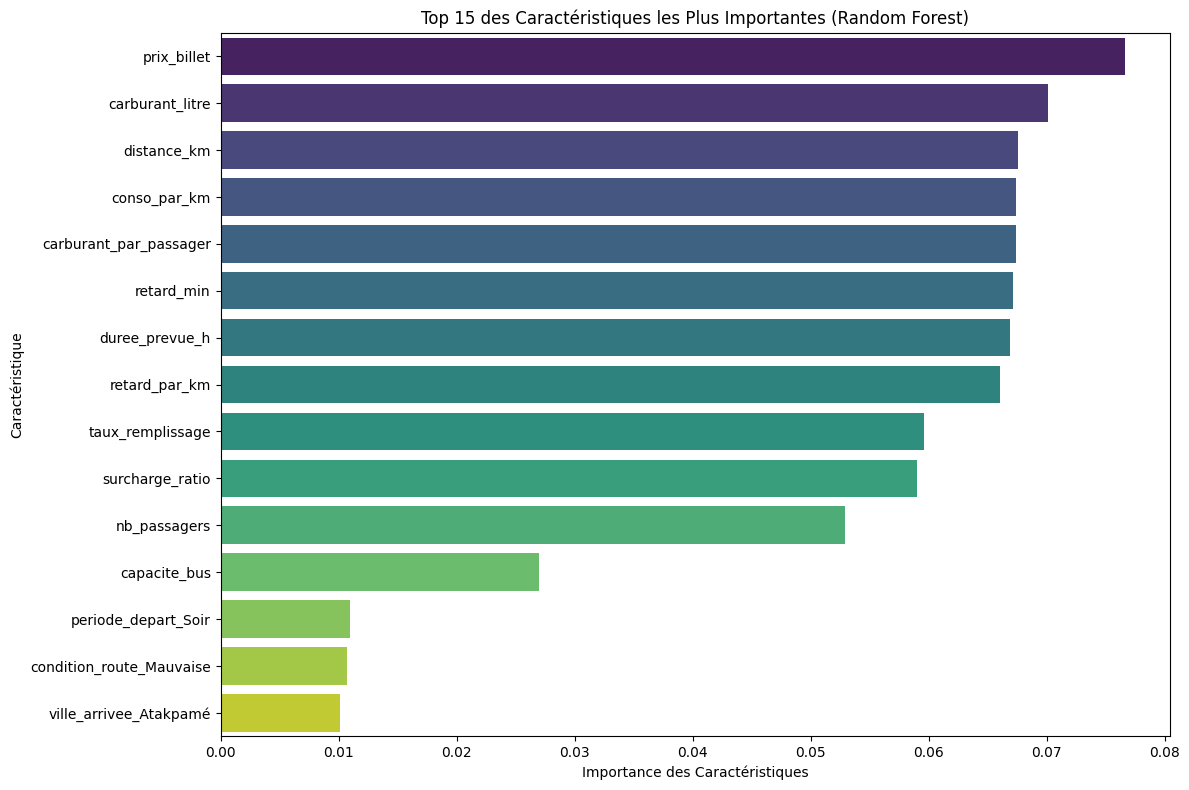

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df.head(15), palette='viridis')
plt.title('Top 15 des Caractéristiques les Plus Importantes (Random Forest)')
plt.xlabel('Importance des Caractéristiques')
plt.ylabel('Caractéristique')
plt.tight_layout()
plt.show()

## **Conclusion générale**

L’objectif de ce projet était d’aider la compagnie de transport **LK** à mieux planifier ses voyages et à réduire l’insatisfaction des clients, en utilisant les données disponibles sur les trajets.

Après un nettoyage rigoureux des données et la mise en place d’un pipeline de prétraitement fiable, plusieurs variables importantes ont été créées pour mieux décrire la réalité du terrain (retards, surcharge, consommation de carburant, etc.). Un modèle de type **Random Forest** a ensuite été entraîné pour identifier les trajets à risque, c’est-à-dire ceux susceptibles de générer des clients insatisfaits.

Les résultats montrent que le modèle est particulièrement efficace pour détecter les situations problématiques, ce qui est essentiel pour prévenir les plaintes et la perte de clients. Le choix du seuil de décision a été fait de manière à privilégier la détection des clients réellement insatisfaits, même si cela entraîne quelques fausses alertes.

L’analyse de l’importance des variables révèle que la satisfaction des clients dépend principalement :

* du **prix du billet** ;
* des **retards** et du manque de respect des horaires ;
* de la **surcharge des bus** ;
* de l’**efficacité de l’utilisation du carburant**, souvent liée à l’état des routes et à la planification ;
* et, dans une moindre mesure, des conditions de route et de l’heure de départ.

Ces résultats montrent que, pour améliorer la satisfaction client, la compagnie doit avant tout agir sur la **gestion des capacités**, la **réduction des retards** et une **meilleure organisation des trajets**, plutôt que de se concentrer uniquement sur la distance ou le type de route.

En résumé, ce modèle ne sert pas seulement à prédire la satisfaction des clients, mais constitue un **outil d’aide à la décision** qui permet à la compagnie LK d’identifier les trajets à risque et de prendre des mesures concrètes pour améliorer la qualité de son service.



# Rapport Final d'Optimisation de la Planification des Voyages (LK) au Togo

## 1. Introduction

Ce rapport détaille l'analyse des données et la modélisation visant à optimiser la planification des voyages et à améliorer la satisfaction client pour la compagnie de transport LK au Togo. L'objectif principal a été de prédire la satisfaction client et d'identifier les facteurs influençant cette satisfaction, en mettant un accent particulier sur la prévention de la perte de clients insatisfaits.

## 2. Chargement et Exploration des Données

Les données ont été chargées à partir d'un fichier CSV. Une première exploration a révélé la présence de valeurs manquantes dans presque toutes les colonnes numériques et catégorielles. Des statistiques descriptives ont permis de comprendre les distributions des variables et de confirmer la nécessité d'un traitement des valeurs manquantes.

## 3. Nettoyage et Préparation des Données

Plusieurs étapes de nettoyage et de préparation ont été effectuées :

*   **Détection des Incohérences :** Identification de 549 trajets où le nombre de passagers dépassait la capacité du bus. Une variable `surcharge_initiale` a été créée pour capturer cette information.
*   **Suppression des Trajets Incohérents :** 326 trajets où la ville de départ était identique à la ville d'arrivée ont été supprimés du jeu de données `data_model` pour garantir la pertinence des trajets interurbains.
*   **Imputation des Valeurs Manquantes :**
    *   Les valeurs manquantes des colonnes numériques (`distance_km`, `duree_prevue_h`, `retard_min`, `prix_billet`, `nb_passagers`, `capacite_bus`, `carburant_litre`) ont été imputées par la **médiane**.
    *   Les valeurs manquantes des colonnes catégorielles (`ville_depart`, `ville_arrivee`, `type_bus`, `jour_semaine`, `periode_depart`, `condition_route`) ont été imputées par le **mode**.

## 4. Ingénierie des Caractéristiques (Feature Engineering)

De nouvelles caractéristiques ont été créées pour enrichir le jeu de données et potentiellement améliorer les performances du modèle :

*   `taux_remplissage` = `nb_passagers` / `capacite_bus`
*   `surcharge_ratio` = `nb_passagers` / `capacite_bus` (similaire à `taux_remplissage`)
*   `retard_par_km` = `retard_min` / `distance_km`
*   `conso_par_km` = `carburant_litre` / `distance_km`
*   `carburant_par_passager` = `carburant_litre` / `nb_passagers`

## 5. Modélisation Préliminaire (Régression Logistique Multi-classes)

Un premier modèle de Régression Logistique a été entraîné sur la variable cible `satisfaction_client` (5 classes, de 1 à 5). Les résultats ont montré une **très faible précision (environ 20%)**, indiquant que ce modèle n'était pas adapté pour distinguer les 5 niveaux de satisfaction.

## 6. Reformulation du Problème et Modélisation Améliorée (Random Forest Binaire)

Face aux performances médiocres du modèle multi-classes, la variable cible a été reformulée en un problème de classification binaire :

*   `satisfaction_binaire` : `1` si `satisfaction_client` >= 4 (satisfait), `0` sinon (non satisfait).
*   La distribution de la nouvelle variable cible a montré un déséquilibre (60% de 0, 40% de 1).

Un modèle `RandomForestClassifier` a ensuite été utilisé, avec `class_weight='balanced'` pour tenter de gérer le déséquilibre des classes.

### **Pipeline de Modélisation :**

Un pipeline a été construit, intégrant les étapes de prétraitement et le modèle :

1.  **Préprocesseur (`ColumnTransformer`) :**
    *   Standardisation (`StandardScaler`) pour les caractéristiques numériques.
    *   Encodage One-Hot (`OneHotEncoder`) pour les caractéristiques catégorielles.
2.  **Modèle :** `RandomForestClassifier`.

### **Évaluation du Modèle Random Forest (Seuil par Défaut)**

*   **Accuracy : 0.573**
*   **Rapport de Classification :**
    *   **Classe 0 (Non satisfait) :** Précision: 0.60, **Rappel: 0.90**, F1-score: 0.72
    *   **Classe 1 (Satisfait) :** Précision: 0.33, Rappel: 0.08, F1-score: 0.12

**Conclusion :** Pour l'objectif de **prévenir la perte de clients insatisfaits**, le modèle avec le seuil par défaut est le plus pertinent. Il présente un excellent rappel pour la classe 0 (0.90), ce qui signifie qu'il est très efficace pour identifier la grande majorité des clients réellement insatisfaits, permettant ainsi d'intervenir proactivement.

### **Évaluation du Modèle Random Forest (Seuil Ajusté à 0.3)**

*   **Accuracy : 0.409**
*   **Rapport de Classification :**
    *   **Classe 0 (Non satisfait) :** Précision: 0.59, Rappel: 0.06, F1-score: 0.12
    *   **Classe 1 (Satisfait) :** Précision: 0.40, **Rappel: 0.93**, F1-score: 0.56

**Conclusion :** L'ajustement du seuil a inversé la performance, rendant le modèle très bon pour détecter les clients satisfaits (Rappel classe 1 de 0.93) mais extrêmement mauvais pour détecter les clients insatisfaits (Rappel classe 0 de 0.06). Ce n'est pas l'option souhaitée pour l'objectif métier défini.

## 7. Analyse de l'Importance des Caractéristiques

L'analyse de l'importance des caractéristiques du modèle Random Forest a révélé les facteurs les plus influents sur la satisfaction client (ou l'insatisfaction) :

1.  **`prix_billet` :** Caractéristique la plus importante.
2.  **`carburant_litre` :** Coût ou efficacité du carburant.
3.  **`distance_km` :** Longueur du trajet.
4.  **`conso_par_km` et `carburant_par_passager` :** Métriques d'efficacité liées au carburant.
5.  **`retard_min` et `retard_par_km` :** L'impact du retard est crucial.
6.  **`duree_prevue_h` :** Durée attendue du voyage.
7.  **`taux_remplissage` et `surcharge_ratio` :** Le niveau d'occupation et la surcharge des bus.
8.  **`nb_passagers` et `capacite_bus` :** Directement liés aux variables de remplissage.

Les variables catégorielles comme la période de départ (`periode_depart_Soir`) et la condition de route (`condition_route_Mauvaise`), ainsi que certaines villes d'arrivée (`ville_arrivee_Atakpamé`), apparaissent également comme importantes, bien qu'à un degré moindre que les variables numériques et d'ingénierie.

## 8. Visualisation du Taux de Remplissage

Un histogramme du `taux_remplissage` a montré une distribution multi-modale avec des pics autour de 0.8 et 1.0, et une proportion significative de trajets avec un `taux_remplissage` supérieur à 1.0 (surcharge). Cela confirme que la surcharge est un phénomène courant et valide l'importance de ces variables dans le modèle.

## 9. Recommandations

Pour la compagnie LK, les actions prioritaires basées sur cette analyse devraient se concentrer sur :

*   **Gestion des Retards :** Mettre en place des stratégies pour minimiser les retards, car ils sont un facteur majeur d'insatisfaction.
*   **Optimisation du Remplissage :** Éviter la surcharge des bus, car elle impacte fortement l'expérience client et est un indicateur clé pour le modèle.
*   **Analyse Tarifaire :** Réévaluer la politique de `prix_billet` en relation avec la satisfaction client, car c'est la caractéristique la plus influente.
*   **Efficacité Opérationnelle :** Examiner les trajets avec une consommation de carburant élevée par kilomètre ou par passager, car cela peut indiquer des problèmes d'efficacité qui pourraient affecter indirectement la satisfaction.

Le modèle développé (Random Forest avec seuil par défaut) est un bon point de départ pour identifier proactivement les clients à risque d'insatisfaction, grâce à son excellent rappel pour la classe "non satisfait". Des efforts supplémentaires pourraient inclure l'optimisation des hyperparamètres, l'exploration d'autres algorithmes plus robustes (ex: XGBoost, LightGBM) et des techniques avancées de gestion du déséquilibre des classes pour potentiellement améliorer la précision sans sacrifier le rappel crucial.